In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            10883 non-null  object 
 1   no_of_adults                          10883 non-null  int64  
 2   no_of_children                        10883 non-null  int64  
 3   no_of_weekend_nights                  10883 non-null  int64  
 4   no_of_week_nights                     10883 non-null  int64  
 5   type_of_meal_plan                     10883 non-null  object 
 6   required_car_parking_space            10883 non-null  int64  
 7   room_type_reserved                    10883 non-null  object 
 8   lead_time                             10883 non-null  int64  
 9   arrival_year                          10883 non-null  int64  
 10  arrival_month                         10883 non-null  int64  
 11  arrival_date   

In [5]:
train.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
# seaborn을 통해 시각화하기
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()     # setting seaborn default for plots

In [7]:
def bar_chart(feature):
    not_cancle = train[train['booking_status']==1][feature].value_counts()
    cancle = train[train['booking_status']==0][feature].value_counts()
    df = pd.DataFrame([not_cancle, cancle])
    df.index = ['not_cancle', 'cancle']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [9]:
bar_chart('arrival_date')

TypeError: no numeric data to plot

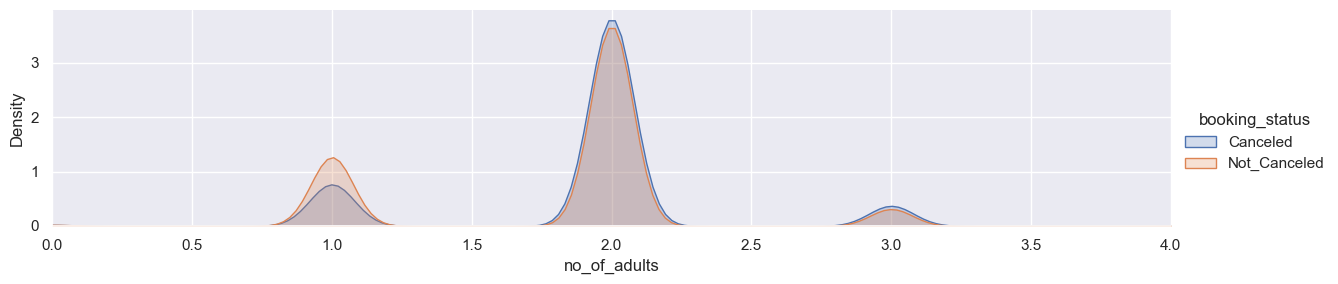

In [11]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'no_of_adults', shade=True)
facet.set(xlim=(0, train['no_of_adults'].max()))
facet.add_legend()

plt.show()

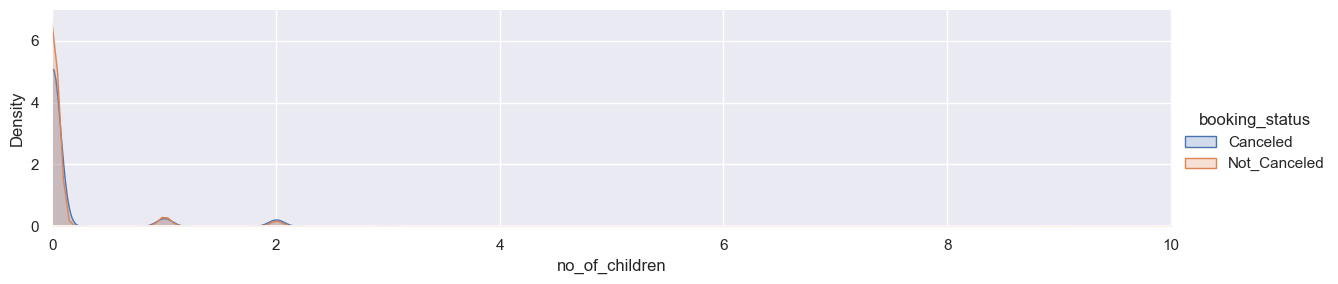

In [12]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'no_of_children', shade=True)
facet.set(xlim=(0, train['no_of_children'].max()))
facet.add_legend()

plt.show()

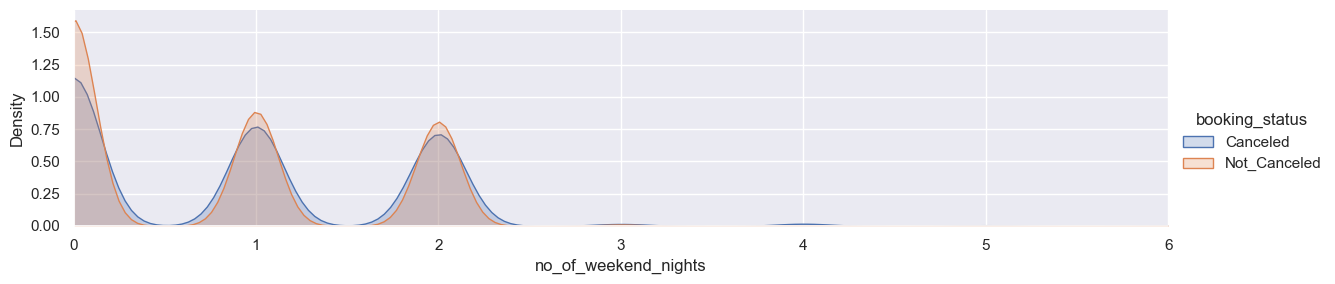

In [13]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'no_of_weekend_nights', shade=True)
facet.set(xlim=(0, train['no_of_weekend_nights'].max()))
facet.add_legend()

plt.show()

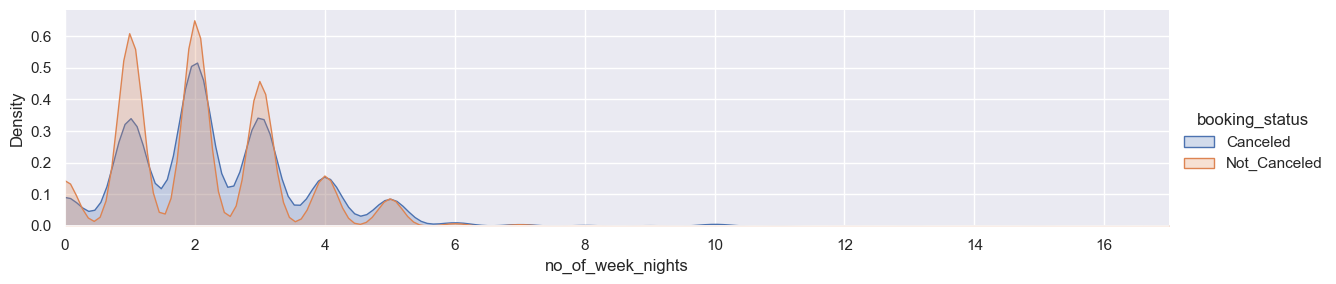

In [14]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'no_of_week_nights', shade=True)
facet.set(xlim=(0, train['no_of_week_nights'].max()))
facet.add_legend()

plt.show()

In [16]:
# type_of_meal_plan

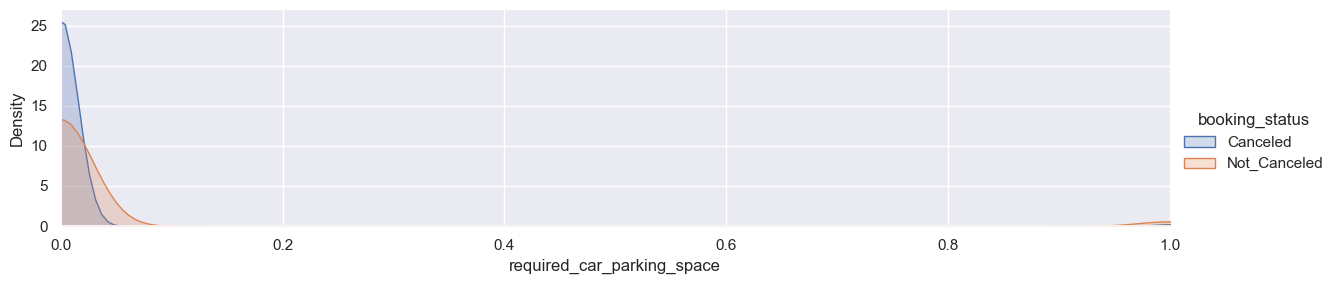

In [17]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'required_car_parking_space', shade=True)
facet.set(xlim=(0, train['required_car_parking_space'].max()))
facet.add_legend()

plt.show()

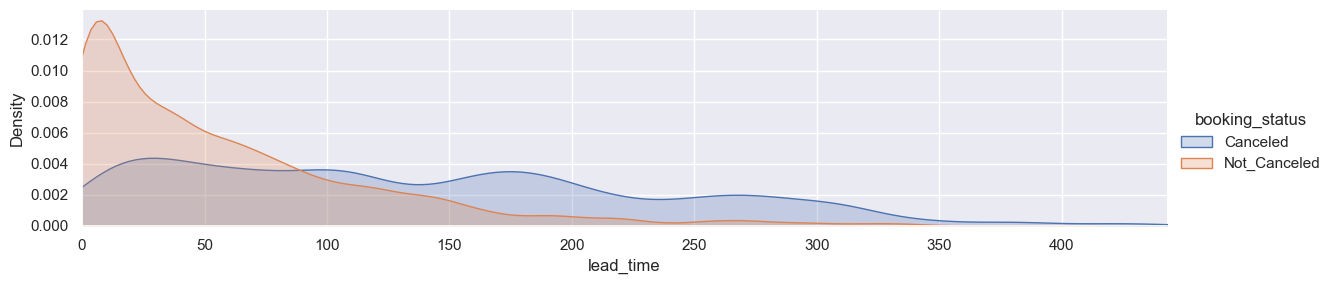

In [18]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'lead_time', shade=True)
facet.set(xlim=(0, train['lead_time'].max()))
facet.add_legend()

plt.show()

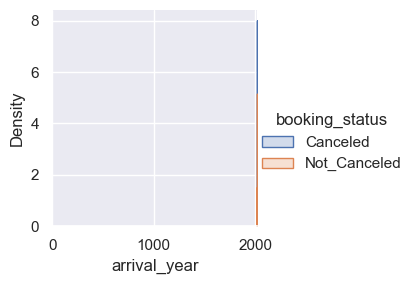

In [20]:
facet = sns.FacetGrid(train, hue="booking_status")
facet.map(sns.kdeplot, 'arrival_year', shade=True)
facet.set(xlim=(0, train['arrival_year'].max()))
facet.add_legend()

plt.show()

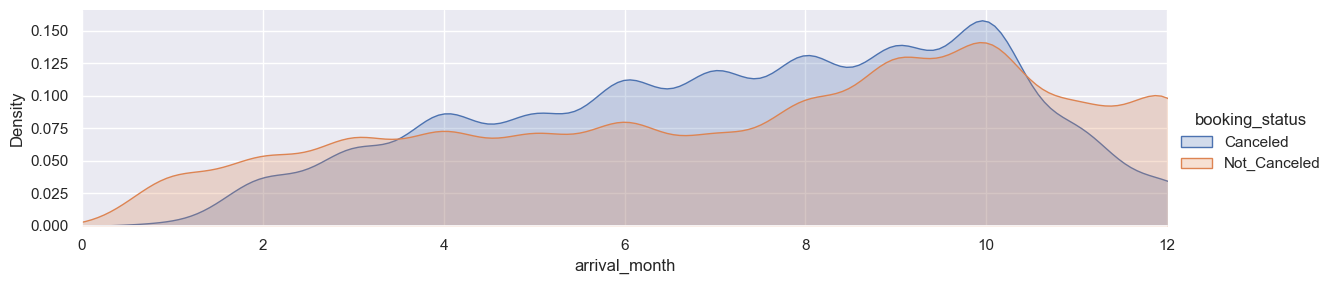

In [21]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'arrival_month', shade=True)
facet.set(xlim=(0, train['arrival_month'].max()))
facet.add_legend()

plt.show()

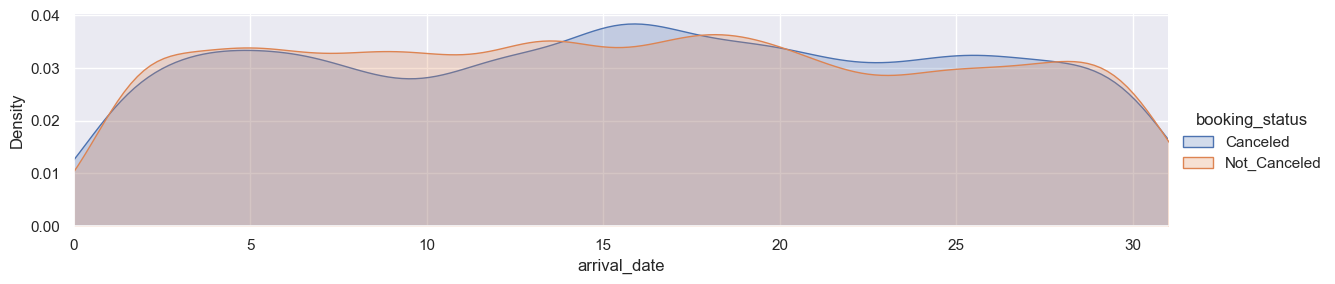

In [22]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'arrival_date', shade=True)
facet.set(xlim=(0, train['arrival_date'].max()))
facet.add_legend()

plt.show()

In [23]:
# market_segment_type

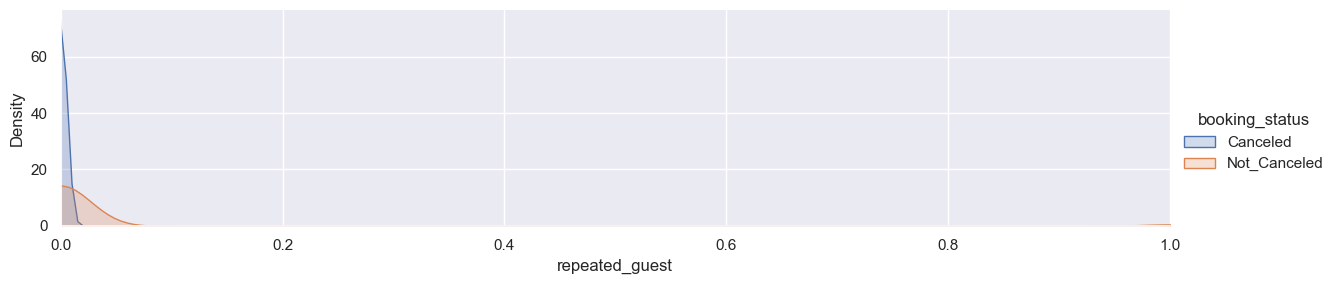

In [24]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'repeated_guest', shade=True)
facet.set(xlim=(0, train['repeated_guest'].max()))
facet.add_legend()

plt.show()

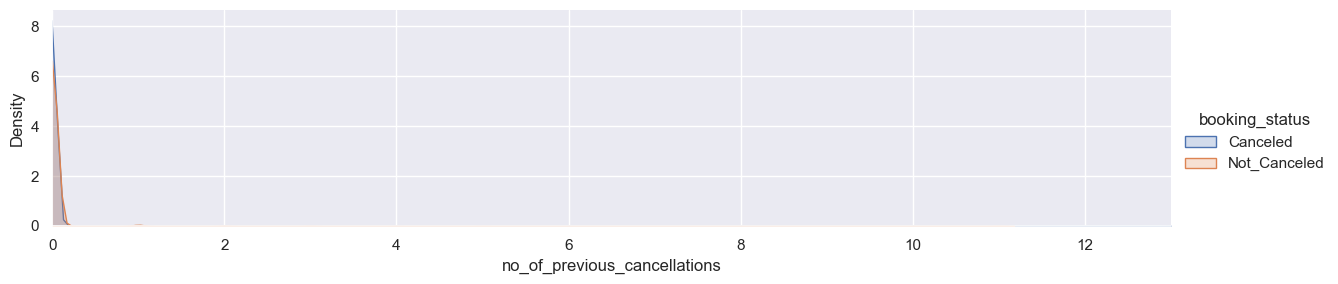

In [25]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'no_of_previous_cancellations', shade=True)
facet.set(xlim=(0, train['no_of_previous_cancellations'].max()))
facet.add_legend()

plt.show()

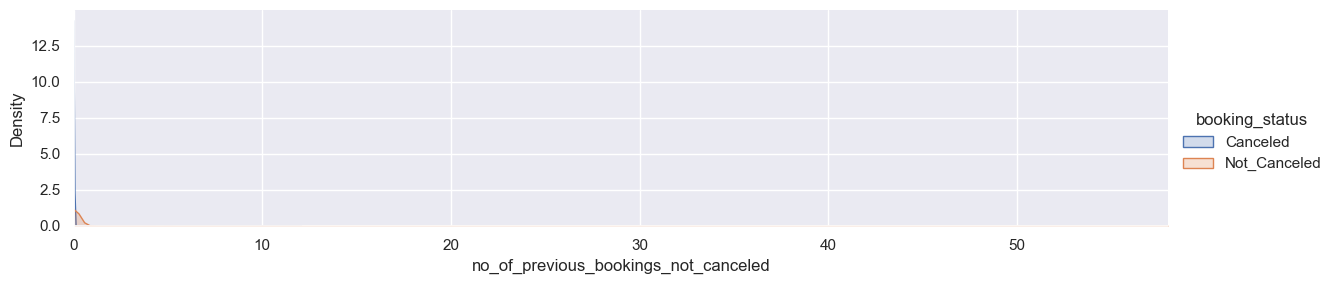

In [26]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'no_of_previous_bookings_not_canceled', shade=True)
facet.set(xlim=(0, train['no_of_previous_bookings_not_canceled'].max()))
facet.add_legend()

plt.show()

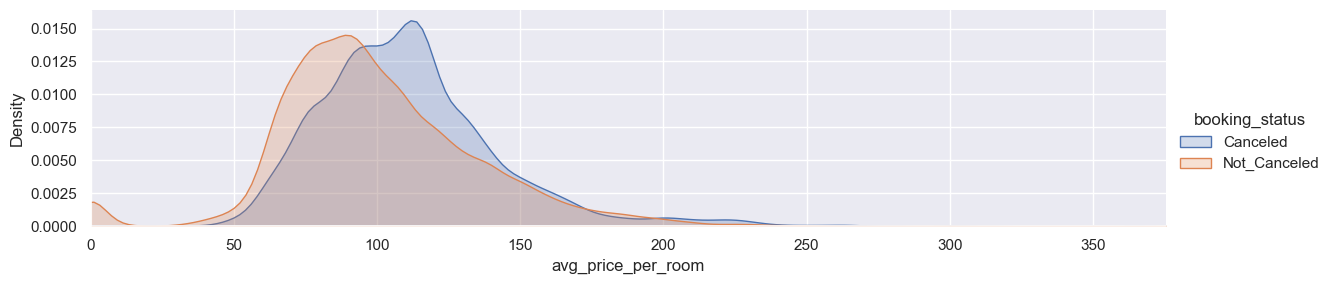

In [27]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'avg_price_per_room', shade=True)
facet.set(xlim=(0, train['avg_price_per_room'].max()))
facet.add_legend()

plt.show()

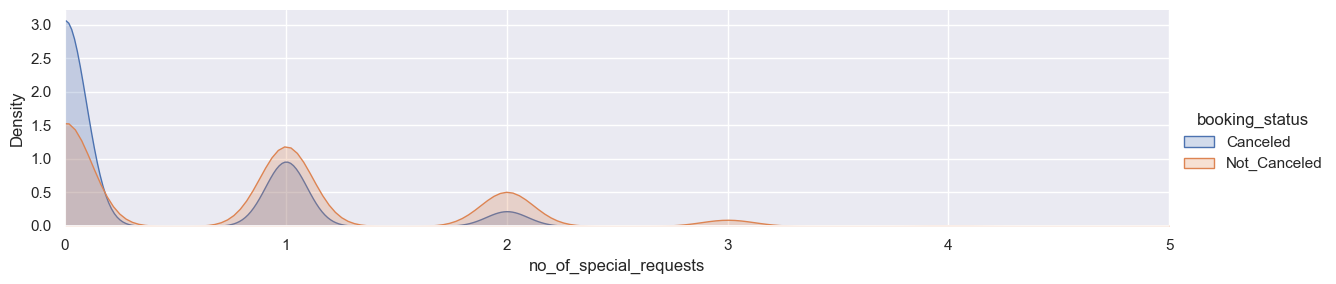

In [28]:
facet = sns.FacetGrid(train, hue="booking_status", aspect=4)
facet.map(sns.kdeplot, 'no_of_special_requests', shade=True)
facet.set(xlim=(0, train['no_of_special_requests'].max()))
facet.add_legend()

plt.show()